# Homework 1 Clustering and Regression

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

## Metrics

In a population where the amount of cats is equal to the amount of dogs. Considering the following classification results from a classifier.

Model A Predicted dog Predicted cat
Actual dog 30 20
Actual cat 10 40

In [184]:
# Cats are class 1 (Positive)
class Model_A_Results():
    def __init__(self, results,positive_class='cat',negative_class='dog'):
        self.results = results
        self.TP = results[1,1]
        self.TN = results[0,0]
        self.FP = results[0,1]
        self.FN = results[1,0]
        self.positive_class = positive_class
        self.negative_class = negative_class

    def print_results(self):
        print(f"Predicted cat - Actual cat (TP): {self.TP}")
        print(f"Predicted cat - Actual dog (FP): {self.FP}")
        print(f"Predicted dog - Actual cat (FN): {self.FN}")
        print(f"Predicted dog - Actual dog (TN): {self.TN}")

    def accuracy(self):
        return (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)

    def precision(self):
        return (self.TP) / (self.TP + self.FP)

    def recall(self):
        return (self.TP) / (self.TP + self.FN)

    def F1(self):
        return 2 / (1/self.precision() + 1/self.recall())


results = np.array([[30,20],
                    [10,40]])

model_a = Model_A_Results(results)
model_a.print_results()
#T1
print(f"Accuracy: {model_a.accuracy()}")

#T2
print(f"Precision: {model_a.precision()}")
print(f"Recall: {model_a.recall()}")
print(f"F1: {model_a.F1()}")

#T3,T4,OT1 TOO EZ i wont do it

Predicted cat - Actual cat (TP): 40
Predicted cat - Actual dog (FP): 20
Predicted dog - Actual cat (FN): 10
Predicted dog - Actual dog (TN): 30
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1: 0.7272727272727273


## Hello Clustering


Recall from lecture that K-means has two main steps: the points assignment
step, and the mean update step. After the initialization of the centroids, we
assign each data point to a centroid. Then, each centroids are updated by
re-estimating the means.
Concretely, if we are given N data points, x1, x2, ..., xN , and we would like
to form K clusters. We do the following;
1. Initialization: Pick K random data points as K centroid locations c1,
c2, ..., cK.
2. Assign: For each data point k, find the closest centroid. Assign that
data point to the centroid. The distance used is typically Euclidean distance.
3. Update: For each centroid, calculate the mean from the data points
assigned to it.
4. Repeat: repeat step 2 and 3 until the centroids stop changing (convergence).
Given the following data points in x-y coordinates (2 dimensional)


In [185]:
class Coordinate():
  def __init__(self,x,y,cluster_num = -1):
    self.x = x
    self.y = y
    self.cluster_num = cluster_num

  def __str__(self):
    return f"({self.x},{self.y},cluster {self.cluster_num})"

  def distance(self, other,equation="l2"):
    if(equation.lower() == "l2"):
      return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
    else:
      return abs(self.x - other.x) + abs(self.y - other.y)

class Cluster():
  def __init__(self, k=1, points=[]):
    self.k = k
    self.points = points
    self.centroids = []

  def reset(self):
    self.centroids = []
    self.points = [Coordinate(point.x,point.y) for point in self.points]

  def add_point(self, point):
    self.points.append(point)

  def init_centroids(self, centroids_points=None):
    if not centroids_points:
      self.centroids = random.sample(self.points, self.k)
      for i in range(self.k):
          self.centroids[i].cluster_num = i
    else:
      self.centroids = centroids_points


  def print_centroids(self):
    for centroid in self.centroids:
      print(centroid)

  def assign_points_to_centroids(self):
    for point in self.points:
      min_distance = float('inf')
      closest_centroid = None
      for centroid in self.centroids:
        dist = point.distance(centroid)
        if dist < min_distance:
          min_distance = dist
          closest_centroid = centroid
      point.cluster_num = closest_centroid.cluster_num

  def update_centroids(self):
    new_centroids = []
    for i in range(self.k):
      points_in_cluster = [point for point in self.points if point.cluster_num == i]
      if points_in_cluster:
        centroid_x = sum(point.x for point in points_in_cluster) / len(points_in_cluster)
        centroid_y = sum(point.y for point in points_in_cluster) / len(points_in_cluster)
        new_centroids.append(Coordinate(centroid_x, centroid_y, i))
      self.centroids = new_centroids

  def plot_clusters(self):
    #use matplotlib to plot all points with different color for each cluster with different symbol for centroid
    plt.figure(figsize=(2,2))
    plt.scatter([point.x for point in self.points], [point.y for point in self.points], c=[point.cluster_num for point in self.points])
    plt.scatter([centroid.x for centroid in self.centroids], [centroid.y for centroid in self.centroids], c='red', marker='x')
    plt.show()

In [186]:
cluster = Cluster(k=4)
cluster.add_point(Coordinate(1,2))
cluster.add_point(Coordinate(3,3))
cluster.add_point(Coordinate(2,2))
cluster.add_point(Coordinate(8,8))
cluster.add_point(Coordinate(6,6))
cluster.add_point(Coordinate(7,7))
cluster.add_point(Coordinate(-3,-3))
cluster.add_point(Coordinate(-2,-4))
cluster.add_point(Coordinate(-7,-7))
# cluster.plot_clusters()

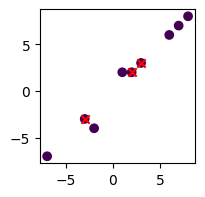

(3,3,cluster 0)
(2,2,cluster 1)
(-3,-3,cluster 2)
Iteration 0


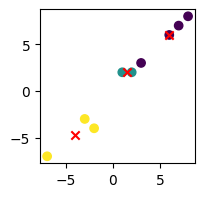

Iteration 1


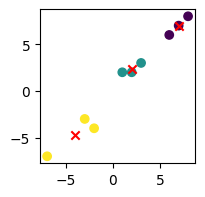

Iteration 2


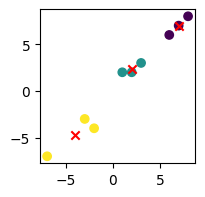

Iteration 3


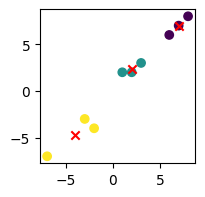

Iteration 4


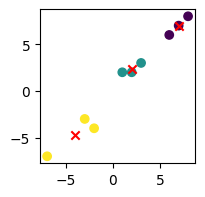

In [187]:
#initialize
cluster.init_centroids(centroids_points=[Coordinate(3,3,0),Coordinate(2,2,1),Coordinate(-3,-3,2)])
cluster.plot_clusters()
cluster.print_centroids()
for i in range(5):
  print(f"Iteration {i}")
  cluster.assign_points_to_centroids()
  cluster.update_centroids()
  cluster.plot_clusters()

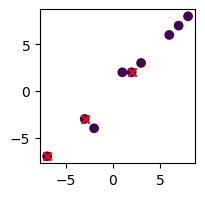

(-3,-3,cluster 0)
(2,2,cluster 1)
(-7,-7,cluster 2)
Iteration 0


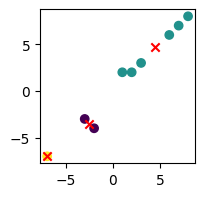

Iteration 1


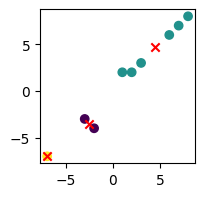

Iteration 2


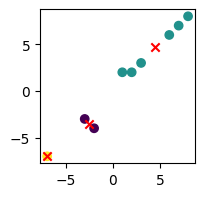

Iteration 3


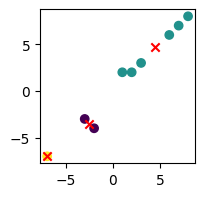

Iteration 4


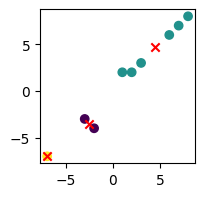

In [188]:
cluster.reset()

#initialize
cluster.init_centroids(centroids_points=[Coordinate(-3,-3,0),Coordinate(2,2,1),Coordinate(-7,-7,2)])
cluster.plot_clusters()
cluster.print_centroids()
for i in range(5):
  print(f"Iteration {i}")
  cluster.assign_points_to_centroids()
  cluster.update_centroids()
  cluster.plot_clusters()

## My heart will go on

In this part of the exercise we will work on the Titanic dataset provided by
Kaggle. The Titanic dataset contains information of the passengers boarding
the Titanic on its final voyage. We will work on predicting whether a given
passenger will survive the trip.

In [189]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"

train = pd.read_csv(train_url) #training set
test = pd.read_csv(test_url) #test set

In [190]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [191]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [193]:
#find median age of training set
median_age_train = train['Age'].median()
print(median_age_train)


28.0


In [194]:
train['Fare'].isna().any()

False

In [195]:
def prep_df(df_train, df_test):
    # Make copies of the input DataFrames to avoid modifying the originals
    df_train_tmp = df_train.copy()
    df_test_tmp = df_test.copy()

    # Calculate median and mode for imputation
    df_train_age_median = df_train_tmp["Age"].median()
    df_train_embarked_mode = df_train_tmp["Embarked"].mode()[0]

    # Fill NaN values in the training set
    df_train_tmp["Age"] = df_train_tmp["Age"].fillna(df_train_age_median)
    df_train_tmp["Embarked"] = df_train_tmp["Embarked"].fillna(df_train_embarked_mode)

    # Fill NaN values in the test set using training set statistics
    df_test_tmp["Age"] = df_test_tmp["Age"].fillna(df_train_age_median)
    df_test_tmp["Embarked"] = df_test_tmp["Embarked"].fillna(df_train_embarked_mode)

    # Map 'Embarked' values to numerical values in both datasets
    embarked_mapping = {"S": 0, "C": 1, "Q": 2}
    df_train_tmp["Embarked"] = df_train_tmp["Embarked"].map(embarked_mapping)
    df_test_tmp["Embarked"] = df_test_tmp["Embarked"].map(embarked_mapping)

    # Replace 'Sex' column with numerical values and explicitly cast to integer
    df_train_tmp["Sex"] = df_train_tmp["Sex"].replace({"male": 0, "female": 1}).astype(int)
    df_test_tmp["Sex"] = df_test_tmp["Sex"].replace({"male": 0, "female": 1}).astype(int)

    return df_train_tmp, df_test_tmp


def pd_to_np(df_train, df_test, features=["Pclass", "Sex", "Age", "Embarked"]):
    # Convert specified columns to numpy arrays
    X_train = df_train[features].to_numpy(dtype=np.float64)
    X_test = df_test[features].to_numpy(dtype=np.float64)
    y_train = df_train["Survived"].to_numpy(dtype=np.int64)
    return X_train, X_test, y_train


In [196]:
train_prep, test_prep = prep_df(train, test)
X_train, X_test, y_train = pd_to_np(train_prep, test_prep)

#check datatype of each col
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

float64
float64
int64
(891, 4)
(418, 4)
(891,)


<ipython-input-195-7f940f23b94f>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train_tmp["Sex"] = df_train_tmp["Sex"].replace({"male": 0, "female": 1}).astype(int)
<ipython-input-195-7f940f23b94f>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_tmp["Sex"] = df_test_tmp["Sex"].replace({"male": 0, "female": 1}).astype(int)


In [197]:
class LogisticRegressionModel():
  def __init__(self, X_train, labels, lr = 0.01, num_iter = 100000, verbose = False):
    self.lr = lr
    self.num_iter = num_iter
    self.X_train = X_train
    self.labels = labels
    self.verbose = verbose

    self.weights = np.ones(X_train.shape[1])
    self.bias = 0

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def pred(self, X=None):
    if X is None:
      X = self.X_train
    # print(self.weights.shape)
    # print(X.shape)
    y_pred = self.sigmoid(np.matmul(X, self.weights))
    # y_pred = self.sigmoid(X @ self.weights)
    return y_pred

  def update_weights_and_bias(self, X=None):
    if X is None:
      X = self.X_train
    y_pred = self.pred(X)
    # print(y_pred)
    diff = self.labels - y_pred
    grad = np.matmul(diff, X)
    # print((1/X.shape[0])*(self.lr * grad))
    self.weights += (1/X.shape[0])*(self.lr * grad)
    self.bias += (1/X.shape[0])*(self.lr * np.sum(diff))

  def fit(self):
    for i in range(self.num_iter):
      self.update_weights_and_bias()

In [198]:
#for testing

# model = LogisticRegressionModel(X_train, y_train)
# print(model.weights)
# # model.pred().shape
# model.update_weights_and_bias()

In [199]:
model = LogisticRegressionModel(X_train, y_train)
print('Before:', model.weights, model.bias)
model.fit()
print('After:', model.weights, model.bias)
# y_pred_test

Before: [1. 1. 1. 1.] 0
After: [-0.71333809  2.65049353 -0.00447566  0.35092113] 14.581545396531888


In [200]:
def export_to_csv(X, binary_y_pred):
  #export as PassengerId, Survived
  df = pd.DataFrame({'PassengerId': X['PassengerId'], 'Survived': binary_y_pred})
  df.to_csv('submission.csv', index=False)
print(model.pred(X_test).shape)
y_pred_test = (model.pred(X_test) >= 0.7).astype(np.int64)
export_to_csv(test, y_pred_test)

(418,)


In [201]:
#skip todo12++ OT